# What makes people happy? Can you find Dytopia?

The `World Happiness Report` is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. Over the last year’s, `World Happiness Report` focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.

<img src="https://allthatsinteresting.com/wordpress/wp-content/uploads/2016/03/giphy-4.gif" width="700px">

**Dataset information**

    The information in the datasets is based on answers to the most life evaluation address inquired within the survey. This address, known as the Cantril step, asks respondents to think of a step with the most excellent conceivable life for them being a 10 and the most exceedingly bad conceivable life being a and to rate their claim current lives on that scale. 


The Happiness Score is explained by the following factors:

- `Overall rank`: happiness rank of the different countries
- `Country o region`
- `Score`:  is a national average of the responses to the main life evaluation question asked in the Gallup World Poll (GWP), which uses the Cantril Ladder. Ranges from [0-10]
- `GDP per capita`
- `Healthy Life Expectancy`: score that goes from [0-1], being 1 the ones that have more confidence in terms of healthy life
- `Social support`: it indicates how people are appreciating the social support by governments, and it that ranges from [0-2]
- `Freedom to make life choices` score that ranges from 0 to 1, being 1 the ones that feel more free
- `Generosity`:score that ranges from 0 to 1, being 1 the ones that feel more generosity 
- `Perceptions of corruption`: perception of corruption on the country that it goes from  0 to 1. The higher this value is the lower perception of corruption 
- `year`  


>dataset: `Ex2.2._Happiness-Score.csv`

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### Exercise 1.Tell a story with your dataset, to try to answer the following question:

>"Which factors are more important to live a happier life? As a result, people and countries can focus on the more significant factors to achieve a higher happiness level "

To achieve this goal, use the different funcionalities from the visualization libraries that you have seen in the module.

In [3]:
happy = pd.read_csv('/Users/inesmourato/Documents/AllWomen/_DA_course/_module2_/datasets/Students_turn/Ex2.2._Happiness-Score.csv')

In [4]:
happy.head()

,Unnamed: 0.1,Unnamed: 0,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,0,0,1,Finland,7.632,1.305,1.592,NaN,0.681,0.202,0.393,2018
1,1,1,2,Norway,7.594,1.456,1.582,NaN,0.686,0.286,0.340,2018
2,2,2,3,Denmark,7.555,1.351,1.590,NaN,0.683,0.284,0.408,2018
3,3,3,4,Iceland,7.495,1.343,1.644,NaN,0.677,0.353,0.138,2018
4,4,4,5,Switzerland,7.487,1.420,1.549,NaN,0.660,0.256,0.357,2018


In [5]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0.1                  312 non-null    int64  
 1   Unnamed: 0                    312 non-null    int64  
 2   Overall rank                  312 non-null    int64  
 3   Country or region             312 non-null    object 
 4   Score                         312 non-null    float64
 5   GDP per capita                312 non-null    float64
 6   Social support                312 non-null    float64
 7   Healthy life expectancy       7 non-null      float64
 8   Freedom to make life choices  312 non-null    float64
 9   Generosity                    312 non-null    float64
 10  Perceptions of corruption     311 non-null    float64
 11  year                          312 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 29.4+ KB


In [6]:
happy.shape

(312, 12)

Questions:
-Is the score related to GDP?
-and so on with all the columns

-are any regions happier than others? is it geographical?

years
is there any differences between 2018 and 2019?


In [7]:
#we are dropping column Healthy life expectancy as there is just 7 non-nulls, also dropping unnamed columns to just keep the overall rank
happy_copy = happy.copy()

In [8]:
happy.drop(columns=["Healthy life expectancy", "Unnamed: 0.1", "Unnamed: 0"], axis=1, inplace=True)

In [9]:
happy.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018


In [10]:
happy["Country or region"].value_counts().tail(20)

Country or region
Zimbabwe                    2
Madagascar                  2
Botswana                    2
Afghanistan                 2
Central African Republic    2
Burundi                     2
Malawi                      2
Haiti                       2
Liberia                     2
Syria                       2
Rwanda                      2
Yemen                       2
Macedonia                   1
Belize                      1
Angola                      1
Sudan                       1
North Macedonia             1
Gambia                      1
Swaziland                   1
Comoros                     1
Name: count, dtype: int64

In [11]:
happy.describe()

,Overall rank,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,311.000000,312.000000
mean,78.500000,5.391506,0.898298,1.211026,0.423538,0.182926,0.111299,2018.500000
std,45.104737,1.114631,0.394592,0.300310,0.156024,0.096739,0.095365,0.500803
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000
25%,39.750000,4.514250,0.609500,1.055750,0.322500,0.108750,0.050000,2018.000000
50%,78.500000,5.379500,0.960000,1.265500,0.449500,0.175500,0.082000,2018.500000
75%,117.250000,6.176000,1.219500,1.457500,0.540250,0.245000,0.140500,2019.000000
max,156.000000,7.769000,2.096000,1.644000,0.724000,0.598000,0.457000,2019.000000


In [12]:
happy.duplicated().sum()

np.int64(0)

In [13]:
import sys
sys.path.insert(0, '/Users/inesmourato/Documents/AllWomen/_DA_course/_functions_')

from functions_eda import *

In [14]:
continent_dict = {
    'Africa': [
        'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde',
        'Cameroon', 'Central African Republic', 'Chad', 'Comoros', "Congo (Brazzaville)", "Congo (Kinshasa)", 'Democratic Republic of the Congo',
        'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia',
        'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya',
        'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia',
        'Niger', 'Nigeria', 'Republic of the Congo', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
        'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', "Swaziland",'Tanzania',
        'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'
    ],
    'Asia': [
        'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei',
        'Cambodia', 'China', 'Cyprus', 'Georgia', "Hong Kong", 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel',
        'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia',
        'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', "Palestinian Territories",
        'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan',
        'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates',
        'Uzbekistan', 'Vietnam', 'Yemen'
    ],
    'Europe': [
        'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',
        'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
        'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo',
        'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', "Macedonia", 'Malta', 'Moldova', 'Monaco', 'Montenegro',
        'Netherlands', 'North Macedonia','Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino',
        'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine',
        'United Kingdom', 'Vatican City'
    ],
    'North America': [
        'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba',
        'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras',
        'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia',
        'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'
    ],
    'South America': [
        'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay',
        'Peru', 'Suriname', "Trinidad & Tobago", 'Uruguay', 'Venezuela'
    ],
    'Oceania': [
        'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand',
        'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'
    ]
}

In [15]:
def get_continent(country) :
    for continent, countries in continent_dict.items() :
        if country in countries :
            return continent
    return "Unknown"

In [16]:
happy['Continent'] = happy['Country or region'].apply(get_continent)

In [17]:
happy[happy["Continent"] == "Unknown"]

,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year,Continent
57,58,Northern Cyprus,5.835,1.229,1.211,0.495,0.179,0.154,2018,Unknown
219,64,Northern Cyprus,5.718,1.263,1.252,0.417,0.191,0.162,2019,Unknown


In [18]:
maptotal = go.Figure(go.Choropleth(
    locationmode='country names',
    locations=happy["Country or region"].values,
    text=happy["Country or region"],
    z=happy['Score'].values
))
maptotal.show()

In [19]:
happy2018 = pd.DataFrame(happy.loc[:155])

In [20]:
happy2019 = pd.DataFrame(happy.loc[156:])

In [21]:
happy2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year,Continent
156,1,Finland,7.769,1.340,1.587,0.596,0.153,0.393,2019,Europe
157,2,Denmark,7.600,1.383,1.573,0.592,0.252,0.410,2019,Europe
158,3,Norway,7.554,1.488,1.582,0.603,0.271,0.341,2019,Europe
159,4,Iceland,7.494,1.380,1.624,0.591,0.354,0.118,2019,Europe
160,5,Netherlands,7.488,1.396,1.522,0.557,0.322,0.298,2019,Europe


In [22]:
map2018 = go.Figure(go.Choropleth(
    locationmode='country names',
    locations=happy2018["Country or region"].values,
    text=happy2018["Country or region"],
    z=happy2018['Score'].values
))
map2018.show()

In [23]:
map2018 = px.choropleth(happy2018,  # Input Pandas DataFrame
                    locations="Country or region", locationmode="country names", # DataFrame column with locations
                    color="Score") # DataFrame column with color values

map2018.update_layout(
    title_text = 'Score per country in 2018' # Create a Title
)

map2018.show()
map2019 = px.choropleth(happy2019,  # Input Pandas DataFrame
                    locations="Country or region", locationmode="country names", # DataFrame column with locations
                    color="Score") # DataFrame column with color values

map2019.update_layout(
    title_text = 'Score per country in 2019' # Create a Title
)

map2019.show()

In [24]:
best20=happy.head(25)
mapbest = px.choropleth(best20,  # Input Pandas DataFrame
                    locations="Country or region", locationmode="country names", # DataFrame column with locations
            color="Score") # DataFrame column with color values

mapbest.update_layout(
    title_text = 'Top 25 countries in 2018' # Create a Title
)

mapbest.show()

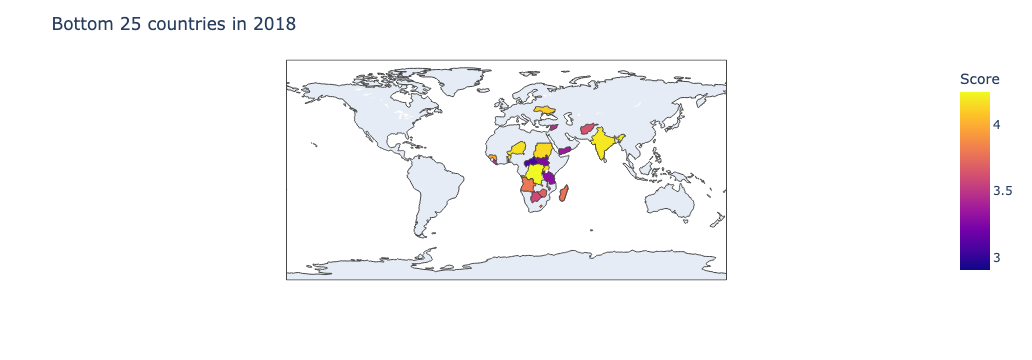

In [76]:
worst20=happy2018.tail(25)
mapworst = px.choropleth(worst20,  # Input Pandas DataFrame
                    locations="Country or region", locationmode="country names", # DataFrame column with locations
            color="Score") # DataFrame column with color values

mapworst.update_layout(
    title_text = 'Bottom 25 countries in 2018' # Create a Title
)

mapworst.show()

In [26]:
OutLiersBox(happy, "Score")

In [27]:
OutLiersBox(happy, "Generosity")

In [28]:
OutLiersBox(happy, "GDP per capita")

In [29]:
OutLiersBox(happy, "Social support")

In [30]:
def find_outliers_iqr(happy):
    for column in happy.select_dtypes(include=[np.number]).columns:  # Only numeric columns
        Q1 = happy[column].quantile(0.25)  # First quartile (25%)
        Q3 = happy[column].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR  # Lower threshold
        upper_bound = Q3 + 1.5 * IQR  # Upper threshold
        
        # Find outliers
        outliers = happy[(happy[column] < lower_bound) | (happy[column] > upper_bound)][column]
        
        # Print outliers if they exist
        if not outliers.empty:
            print(f"Outliers in column '{column}':")
            print(outliers.to_list(), "\n")
        else:
            print(f"No outliers in column '{column}'.\n")

# Run the function
find_outliers_iqr(happy)

No outliers in column 'Overall rank'.

No outliers in column 'Score'.

No outliers in column 'GDP per capita'.

Outliers in column 'Social support':
[0.3720000000000001, 0.382, 0.0, 0.4370000000000001, 0.447, 0.378, 0.0] 

No outliers in column 'Freedom to make life choices'.

Outliers in column 'Generosity':
[0.484, 0.598, 0.498, 0.5660000000000001] 

Outliers in column 'Perceptions of corruption':
[0.393, 0.34, 0.408, 0.357, 0.295, 0.291, 0.389, 0.383, 0.302, 0.306, 0.28, 0.321, 0.457, 0.291, 0.282, 0.444, 0.393, 0.41, 0.341, 0.298, 0.343, 0.373, 0.38, 0.308, 0.29, 0.316, 0.278, 0.31, 0.453, 0.287, 0.411] 

No outliers in column 'year'.



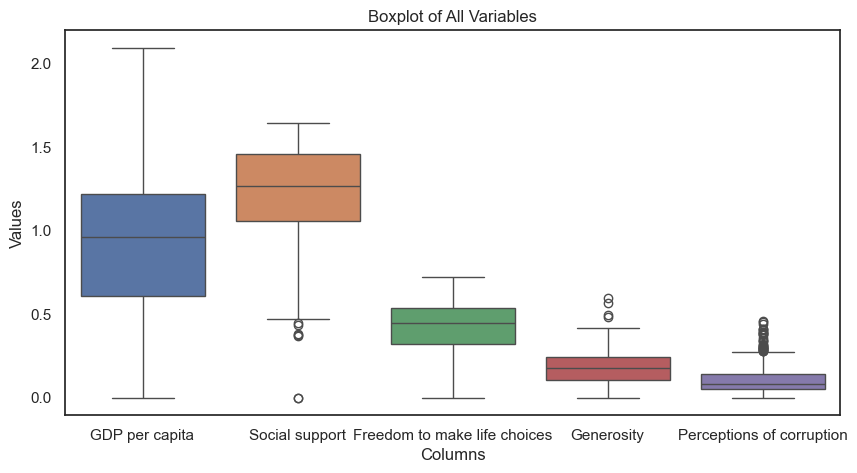

In [31]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=happy.loc[:, 'GDP per capita':'Perceptions of corruption'])

plt.title("Boxplot of All Variables")
plt.xlabel("Columns")
plt.ylabel("Values")

plt.show()

In [32]:
get_column_names(happy)


Numerical variables are:
 Index(['Overall rank', 'Score', 'GDP per capita', 'Social support',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'year'],
      dtype='object')
-------------------------------------------------
Categorical variables are:
 Index(['Country or region', 'Continent'], dtype='object')
-------------------------------------------------


(Index(['Overall rank', 'Score', 'GDP per capita', 'Social support',
        'Freedom to make life choices', 'Generosity',
        'Perceptions of corruption', 'year'],
       dtype='object'),
 Index(['Country or region', 'Continent'], dtype='object'))

In [33]:
#The boxplots show that we have some potential outliers in columns "Generosity", "social support" and "Perceptions of corruption" 

In [34]:
#let's see the outliers
potential_outliers_generosity = happy[happy['Generosity'].isin([0.484, 0.598, 0.498, 0.5660000000000001])]
potential_outliers_generosity

,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year,Continent
95,96,Indonesia,5.093,0.899,1.215,0.538,0.484,0.018,2018,Asia
129,130,Myanmar,4.308,0.682,1.174,0.580,0.598,0.178,2018,Asia
247,92,Indonesia,5.192,0.931,1.203,0.491,0.498,0.028,2019,Asia
286,131,Myanmar,4.360,0.710,1.181,0.525,0.566,0.172,2019,Asia


In [35]:
potential_outliers_socialsupport = happy[happy['Social support'].isin([0.3720000000000001, 0.382, 0.0, 0.4370000000000001, 0.447, 0.378, 0.0])]
potential_outliers_socialsupport

,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year,Continent
135,136,Benin,4.141,0.378,0.372,0.440,0.163,0.067,2018,Africa
149,150,Syria,3.462,0.689,0.382,0.088,0.376,0.144,2018,Asia
154,155,Central African Republic,3.083,0.024,0.000,0.305,0.218,0.038,2018,Africa
257,102,Benin,4.883,0.393,0.437,0.349,0.175,0.082,2019,Africa
300,145,Burundi,3.775,0.046,0.447,0.220,0.176,0.180,2019,Africa
304,149,Syria,3.462,0.619,0.378,0.013,0.331,0.141,2019,Asia
310,155,Central African Republic,3.083,0.026,0.000,0.225,0.235,0.035,2019,Africa


In [36]:
potential_outliers_perceptionsofcorruptions = happy[happy["Perceptions of corruption"].isin([0.393, 0.34, 0.408, 0.357, 0.295, 0.291, 0.389, 0.383, 0.302, 0.306, 0.28, 0.321, 0.457, 0.291, 0.282, 0.444, 0.393, 0.41, 0.341, 0.298, 0.343, 0.373, 0.38, 0.308, 0.29, 0.316, 0.278, 0.31, 0.453, 0.287, 0.411])]
potential_outliers_perceptionsofcorruptions

,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year,Continent
0,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018,Europe
1,2,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018,Europe
2,3,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018,Europe
4,5,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018,Europe
5,6,Netherlands,7.441,1.361,1.488,0.638,0.333,0.295,2018,Europe
6,7,Canada,7.328,1.330,1.532,0.653,0.321,0.291,2018,North America
7,8,New Zealand,7.324,1.268,1.601,0.669,0.365,0.389,2018,Oceania
8,9,Sweden,7.314,1.355,1.501,0.659,0.285,0.383,2018,Europe
9,10,Australia,7.272,1.340,1.573,0.647,0.361,0.302,2018,Oceania
13,14,Ireland,6.977,1.448,1.583,0.614,0.307,0.306,2018,Europe


#we're deciding to keep the outliers as the numbers are inside the range and makes logical sense to keep them. We found a report of generosity for ex that supports our decision.
https://www.cafonline.org/docs/default-source/inside-giving/wgi/wgi_2024_report.pdf 

Doing some exploratory univariate analysis to check distribution on year 2018 and 2019

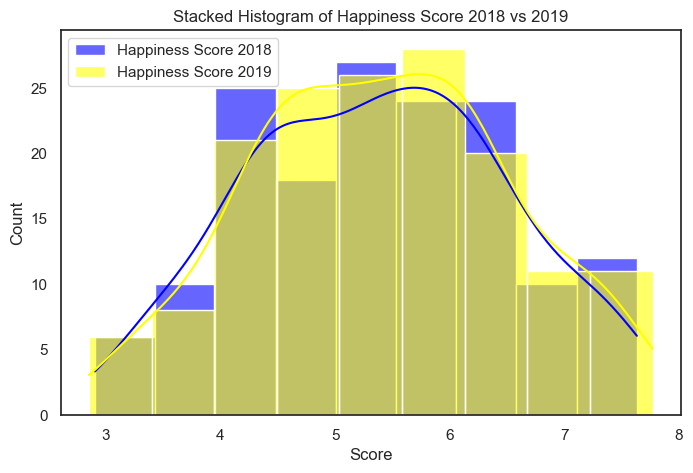

In [37]:
#histogram of Score
plt.figure(figsize=(8, 5))
sns.histplot(happy2018, x="Score", kde=True, color="blue", label="Happiness Score 2018", alpha=0.6)
sns.histplot(happy2019, x="Score", kde=True, color="yellow", label="Happiness Score 2019", alpha=0.6)

# Add labels & legend
plt.title("Stacked Histogram of Happiness Score 2018 vs 2019")
plt.legend()
plt.show()

In [38]:
fig = px.histogram(happy, x="Score", 
                   color="year", barmode = "group") # this is like hue parameter in Seaborn
                   #color_discrete_sequence=colors_2014) # custom color palette for categorical data visualizations

# Step 2: Update the layout of the plot
fig.update_layout(title_text='Histogram of Happiness Score 2018 vs 2019')

fig.update_traces(xbins=dict(start=0, end=10, size=1))  # Ensures whole-number bins

# Step 3: Update the axes styling
fig.update_xaxes(title= 'Score', 
                 ticklen = 5, # This parameter specifies the length of the ticks on the axis
                 zeroline = False,
                dtick= 1) # This option disables the zero line on the axis
fig.update_yaxes(title= 'Count', 
                 ticklen = 10, # This parameter specifies the length of the ticks on the axis
                 zeroline = False) # This option disables the zero line on the axis

# Step 4: Show the plot
fig.show()

In [39]:
#we can see that the overall score from 2018 to 2019 is a bit different. in 2019 the curve is more consistent than in 2018, but not too different

In [40]:
#let's check the other columns on the data set

In [41]:
fig = px.histogram(happy, x="Score", 
                   color="year", # this is like hue parameter in Seaborn
                   ) # custom color palette for categorical data visualizations

# Step 2: Update the layout of the plot
fig.update_layout(title_text='Students-staff ratio in 2014 and 2016')

# Step 3: Update the axes styling
fig.update_xaxes(title= 'Students-staff ratio', 
                 ticklen = 5, # This parameter specifies the length of the ticks on the axis
                 zeroline = False) # This option disables the zero line on the axis
fig.update_yaxes(title= 'Count', 
                 ticklen = 5, # This parameter specifies the length of the ticks on the axis
                 zeroline = False) # This option disables the zero line on the axis

# Step 4: Show the plot
fig.show()

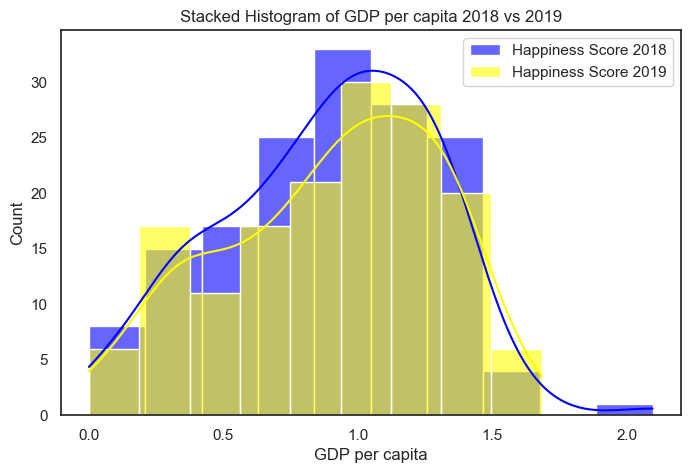

In [42]:
plt.figure(figsize=(8, 5))
sns.histplot(happy2018, x="GDP per capita", kde=True, color="blue", label="Happiness Score 2018", alpha=0.6)
sns.histplot(happy2019, x="GDP per capita", kde=True, color="yellow", label="Happiness Score 2019", alpha=0.6)


plt.title("Stacked Histogram of GDP per capita 2018 vs 2019")
plt.legend()
plt.show()

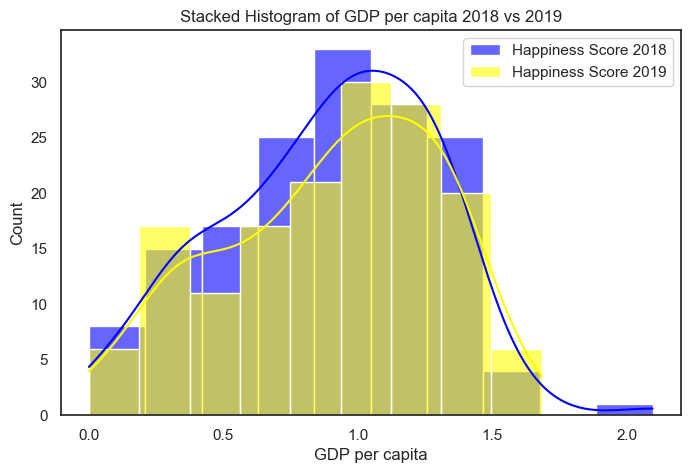

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

# Plot histograms for 2018 and 2019, stacking them
sns.histplot(happy2018, x="GDP per capita", kde=True, color="blue", label="Happiness Score 2018", alpha=0.6, multiple="stack")
sns.histplot(happy2019, x="GDP per capita", kde=True, color="yellow", label="Happiness Score 2019", alpha=0.6, multiple="stack")

plt.title("Stacked Histogram of GDP per capita 2018 vs 2019")
plt.legend()
plt.show()


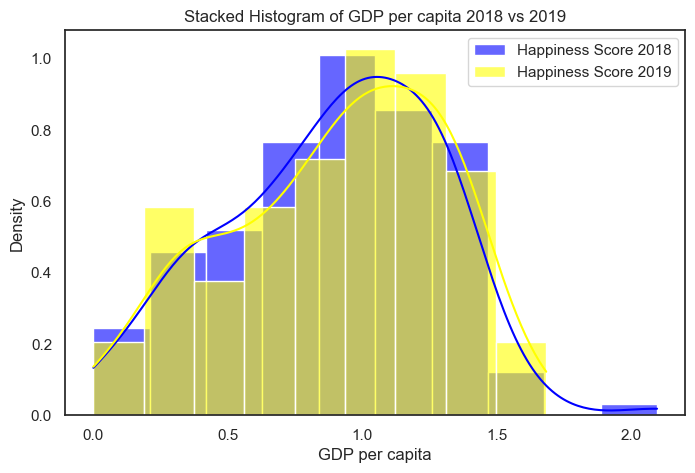

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

# Plot histograms for 2018 and 2019 with stacking
sns.histplot(happy2018, x="GDP per capita", kde=True, color="blue", label="Happiness Score 2018", alpha=0.6, stat="density", common_norm=False)
sns.histplot(happy2019, x="GDP per capita", kde=True, color="yellow", label="Happiness Score 2019", alpha=0.6, stat="density", common_norm=False)

plt.title("Stacked Histogram of GDP per capita 2018 vs 2019")
plt.legend()
plt.show()


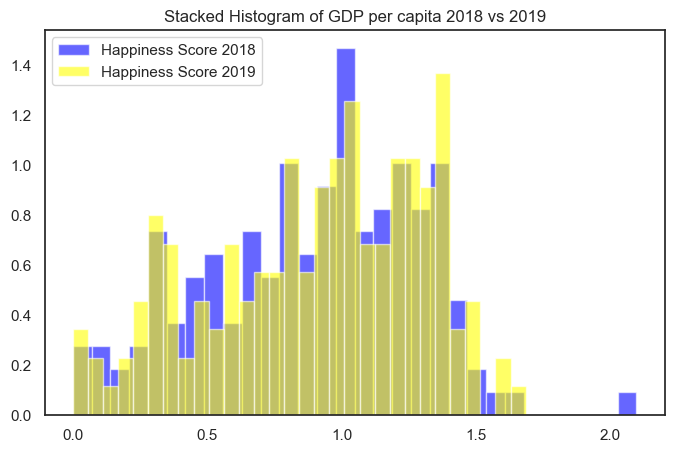

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(8, 5))

# Plot histograms for 2018 and 2019 with stacking using matplotlib
plt.hist(happy2018["GDP per capita"], bins=30, alpha=0.6, label="Happiness Score 2018", color="blue", density=True)
plt.hist(happy2019["GDP per capita"], bins=30, alpha=0.6, label="Happiness Score 2019", color="yellow", density=True)

# Add a title and legend
plt.title("Stacked Histogram of GDP per capita 2018 vs 2019")
plt.legend()

# Show the plot
plt.show()


In [46]:
#it seems that gdp per capita in 2019 is lower than in 2018. If we compare it with the histogram of the total score this gives us the clue that money is not a determining factor of happiness or at least not on its own

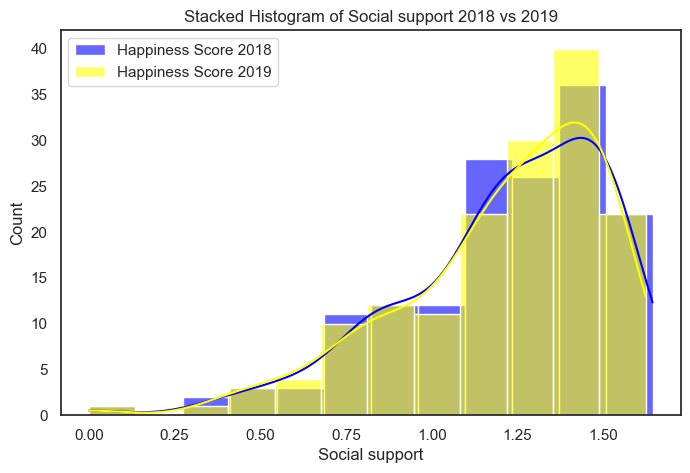

In [47]:
plt.figure(figsize=(8, 5))
sns.histplot(happy2018, x="Social support", kde=True, color="blue", label="Happiness Score 2018", alpha=0.6)
sns.histplot(happy2019, x="Social support", kde=True, color="yellow", label="Happiness Score 2019", alpha=0.6)


plt.title("Stacked Histogram of Social support 2018 vs 2019")
plt.legend()
plt.show()

In [48]:
#pretty similar but a bit higher than in 2018, this gives us the clue that social support is key for total score

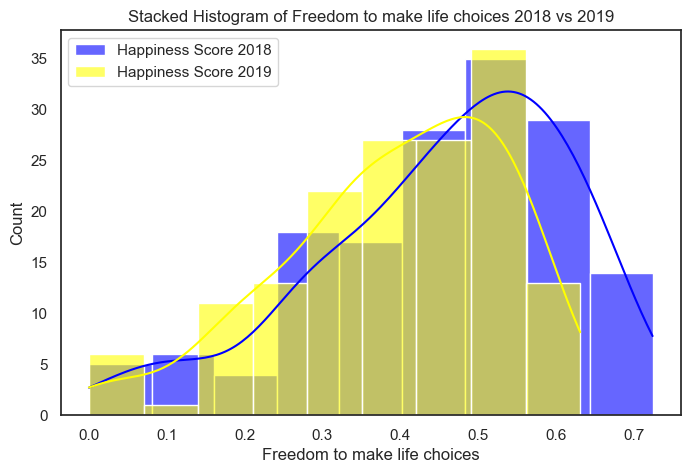

In [49]:
plt.figure(figsize=(8, 5))
sns.histplot(happy2018, x="Freedom to make life choices", kde=True, color="blue", label="Happiness Score 2018", alpha=0.6)
sns.histplot(happy2019, x="Freedom to make life choices", kde=True, color="yellow", label="Happiness Score 2019", alpha=0.6)


plt.title("Stacked Histogram of Freedom to make life choices 2018 vs 2019")
plt.legend()
plt.show()

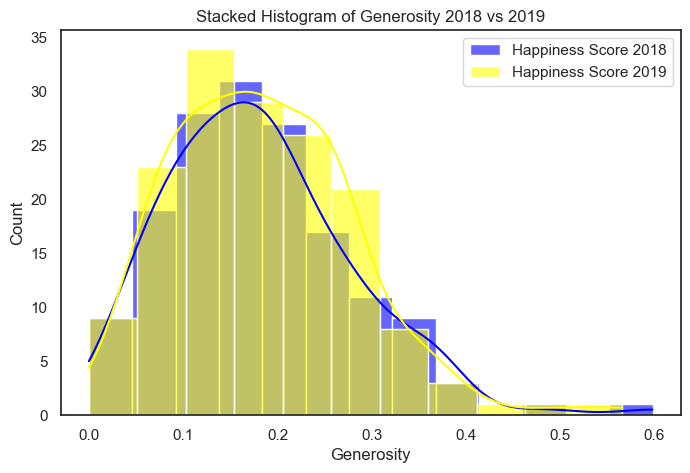

In [50]:
plt.figure(figsize=(8, 5))
sns.histplot(happy2018, x="Generosity", kde=True, color="blue", label="Happiness Score 2018", alpha=0.6)
sns.histplot(happy2019, x="Generosity", kde=True, color="yellow", label="Happiness Score 2019", alpha=0.6)


plt.title("Stacked Histogram of Generosity 2018 vs 2019")
plt.legend()
plt.show()

In [51]:
#overall higher in 2019, maybe key in total score?

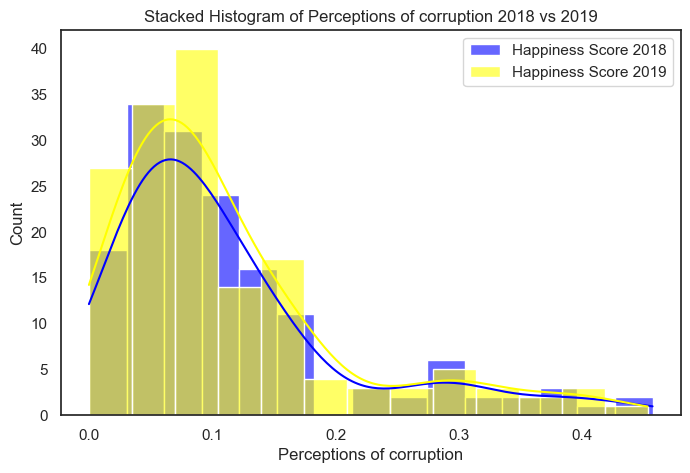

In [52]:
plt.figure(figsize=(8, 5))
sns.histplot(happy2018, x="Perceptions of corruption", kde=True, color="blue", label="Happiness Score 2018", alpha=0.6)
sns.histplot(happy2019, x="Perceptions of corruption", kde=True, color="yellow", label="Happiness Score 2019", alpha=0.6)


plt.title("Stacked Histogram of Perceptions of corruption 2018 vs 2019")
plt.legend()
plt.show()

In [53]:
#also seems quite key

In [54]:
#let's do some bivariate analysis to check these hypothesis

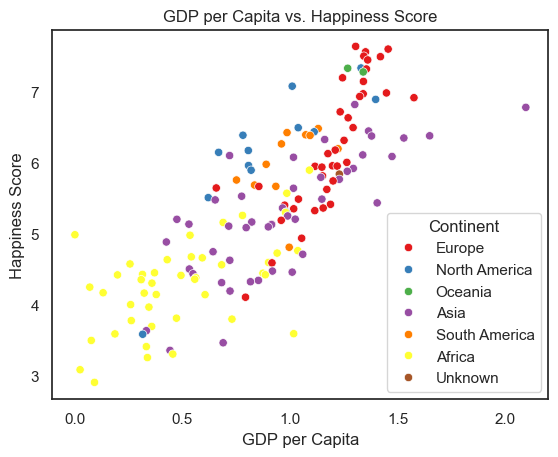

In [55]:
#Are rich countries happier in 2018?
sns.scatterplot(x=happy2018["GDP per capita"], y=happy2018["Score"], hue=happy2018["Continent"], palette="Set1")
plt.title("GDP per Capita vs. Happiness Score")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.show()

There is a clear correlation between the GDP per capita and the Score. 
We can also see that there is a geographical correlation that we have already seen on the first map that we did.
This would suggest that the richest the happier but what about the other variables?

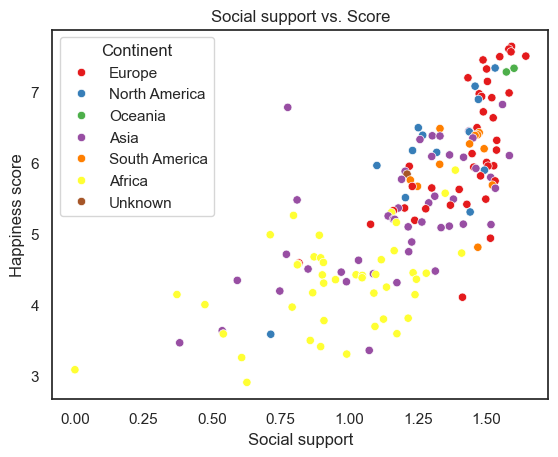

In [56]:
#let's see how Score and social support compare
sns.scatterplot(x=happy2018["Social support"], y=happy2018["Score"], hue=happy2018["Continent"], palette="Set1")
plt.title("Social support vs. Score")
plt.xlabel("Social support")
plt.ylabel("Happiness score")
plt.show()

There seems to be a correlation as well but more concentrated to the right. 
This tells us that even countries that have a medium social support still are not really happy

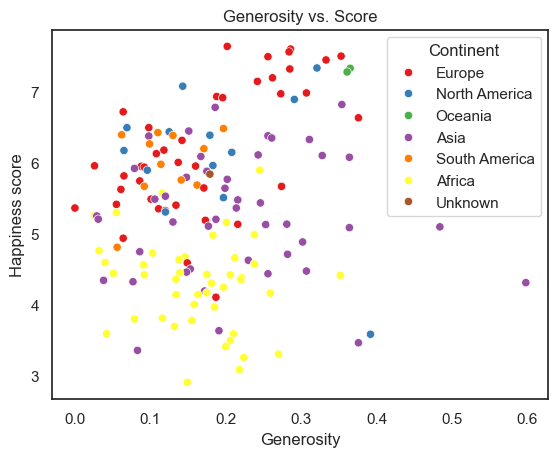

In [57]:
#lets compare the score and the generosity
sns.scatterplot(x=happy2018["Generosity"], y=happy2018["Score"], hue=happy2018["Continent"], palette="Set1")
plt.title("Generosity vs. Score")
plt.xlabel("Generosity")
plt.ylabel("Happiness score")
plt.show()

Here there is no clear pattern, Generosity doesn't seem to be a lead variable. Countries with low generosity have a high happiness score

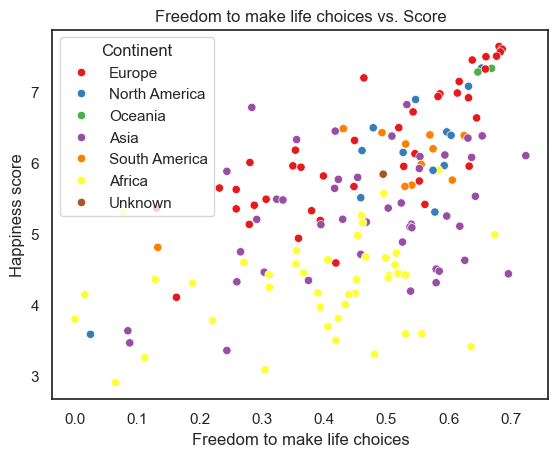

In [58]:
#lets compare the score and the Freedom to make life choices
sns.scatterplot(x=happy2018["Freedom to make life choices"], y=happy2018["Score"], hue=happy2018["Continent"], palette="Set1")
plt.title("Freedom to make life choices vs. Score")
plt.xlabel("Freedom to make life choices")
plt.ylabel("Happiness score")
plt.show()

In this case there is a correlation but more scattered than GDP or social support

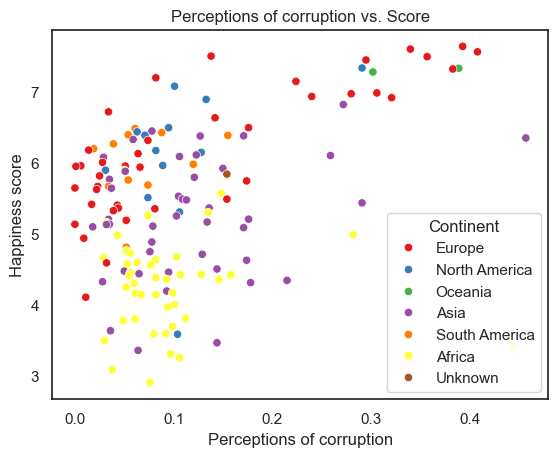

In [59]:
#lets compare the score and the Freedom to make life choices
sns.scatterplot(x=happy2018["Perceptions of corruption"], y=happy2018["Score"], hue=happy2018["Continent"], palette="Set1")
plt.title("Perceptions of corruption vs. Score")
plt.xlabel("Perceptions of corruption")
plt.ylabel("Happiness score")
plt.show()

according to the info : perception of corruption on the country that it goes from 0 to 1. The higher this value is the lower perception of corruption
correlation is skewed to the left. Apparently this varibale doens't seem to be a key for happiness. But don't know if the info is correct?

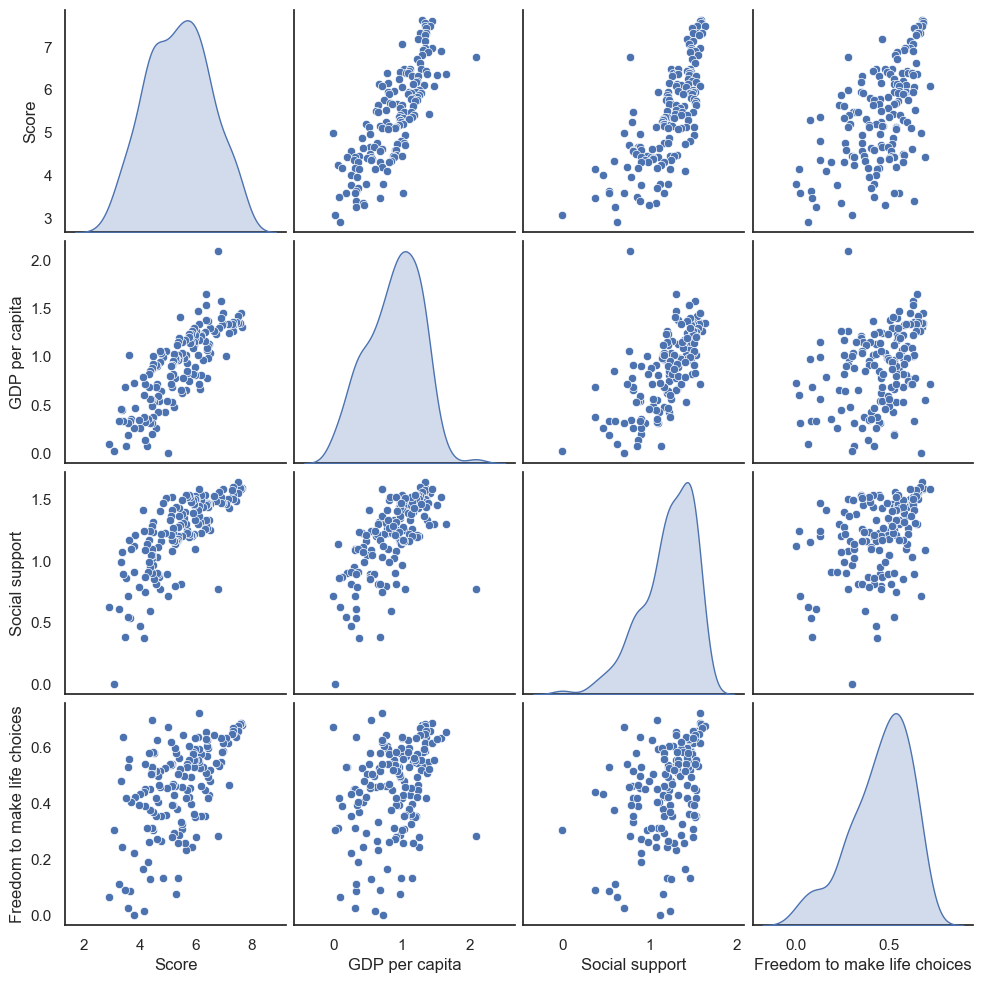

In [60]:
#let's do a pairplot to see how the key variables compare to each other
sns.pairplot(happy2018[["Score", "GDP per capita", "Social support", "Freedom to make life choices"]], diag_kind="kde")

plt.show()

There seems to be a correlation between all these variables, this tells us that these variables are key for happinness

But is x influencing y, or y influencing x? We need to get more info maybe on Google academics

In [61]:
#according to the map we did at the beggining 
grouped_df_score_gdp_mean = happy2018.groupby('Continent', as_index=False).agg({'Score':'mean',
                                                'GDP per capita':'mean'})
print(grouped_df_score_gdp_mean)

       Continent     Score  GDP per capita
0         Africa  4.289364        0.495432
1           Asia  5.262267        0.966067
2         Europe  6.189025        1.185000
3  North America  6.086769        0.898923
4        Oceania  7.298000        1.304000
5  South America  5.999000        0.988273
6        Unknown  5.835000        1.229000


In [62]:
fig = px.bar(grouped_df_score_gdp_mean, x= "Continent",
                                            y=["Score", "GDP per capita"])
fig.update_layout(barmode='group')
fig.update_yaxes(title= 'Values', ticklen= 10, zeroline= False)
fig.show()

In [63]:
corr_value = happy2018[['Score', 'GDP per capita', "Social support", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]].corr()
print(corr_value)

                                 Score  GDP per capita  Social support  \
Score                         1.000000        0.802124        0.745760   
GDP per capita                0.802124        1.000000        0.672080   
Social support                0.745760        0.672080        1.000000   
Freedom to make life choices  0.544280        0.332275        0.411087   
Generosity                    0.135825       -0.011241        0.018226   
Perceptions of corruption     0.405292        0.319582        0.218364   

                              Freedom to make life choices  Generosity  \
Score                                             0.544280    0.135825   
GDP per capita                                    0.332275   -0.011241   
Social support                                    0.411087    0.018226   
Freedom to make life choices                      1.000000    0.297988   
Generosity                                        0.297988    1.000000   
Perceptions of corruption            

In [64]:
corr_value = happy2019[['Score', 'GDP per capita', "Social support", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]].corr()
print(corr_value)

                                 Score  GDP per capita  Social support  \
Score                         1.000000        0.793883        0.777058   
GDP per capita                0.793883        1.000000        0.754906   
Social support                0.777058        0.754906        1.000000   
Freedom to make life choices  0.566742        0.379079        0.447333   
Generosity                    0.075824       -0.079662       -0.048126   
Perceptions of corruption     0.385613        0.298920        0.181899   

                              Freedom to make life choices  Generosity  \
Score                                             0.566742    0.075824   
GDP per capita                                    0.379079   -0.079662   
Social support                                    0.447333   -0.048126   
Freedom to make life choices                      1.000000    0.269742   
Generosity                                        0.269742    1.000000   
Perceptions of corruption            

In [65]:
values_usa = happy2019[happy2019["Country or region"] == "United States"][['Score', 'GDP per capita', "Social support"]]
print(values_usa) 

     Score  GDP per capita  Social support
174  6.892           1.433           1.457


In [66]:
fig = px.bar(happy2018, x = 'Continent', 
                 y = "Score") # define a custom color palette for categorical data visualizations

# Step 2: Show the plot
fig.show()

In [67]:
#!pip install scikit-learn

from sklearn.preprocessing import MinMaxScaler

numeric_cols = happy2018.select_dtypes(include=['number'])
# Apply MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_cols)
# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols.columns)
# If needed, add back non-numeric columns
scaled_df = happy2018[['Country or region', 'Continent']].join(scaled_df)

grouped_df_score_gdp_mean = scaled_df.groupby('Continent', as_index=False).agg({'Score':'mean', 'GDP per capita':'mean', "Social support" : "mean", "Freedom to make life choices":"mean"})

grouped_df_score_gdp_mean = grouped_df_score_gdp_mean[grouped_df_score_gdp_mean["Continent"] != "Unknown"]

fig = px.bar(grouped_df_score_gdp_mean, x= "Continent",
                                            y=["Score", "GDP per capita", "Social support", "Freedom to make life choices"])
fig.update_layout(barmode='group',
                 title="Key Indicators per Continent")
fig.update_yaxes(title= 'Values', ticklen= 10, zeroline= False)
fig.show()

In [68]:
happy2018_matrix = happy2018.loc[:,["Score","GDP per capita", "Social support", "Freedom to make life choices"]]

In [69]:
fig = ff.create_scatterplotmatrix(happy2018_matrix, 
                                  diag='box', # Display a boxplot in the diagonal of the matrix. Other values are histogram and scatter
                                  colormap='Portland',
                                  height=800, 
                                  width=800)

# Step 2: Show the plot
fig.show()

In [70]:
happy.loc[happy["Country or region"].isin(["Canada", "United States"]), :]


,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year,Continent
6,7,Canada,7.328,1.330,1.532,0.653,0.321,0.291,2018,North America
17,18,United States,6.886,1.398,1.471,0.547,0.291,0.133,2018,North America
164,9,Canada,7.278,1.365,1.505,0.584,0.285,0.308,2019,North America
174,19,United States,6.892,1.433,1.457,0.454,0.280,0.128,2019,North America


In [71]:
happy.loc[happy["Continent"]== "North America", :]


,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year,Continent
6,7,Canada,7.328,1.330,1.532,0.653,0.321,0.291,2018,North America
12,13,Costa Rica,7.072,1.010,1.459,0.632,0.143,0.101,2018,North America
17,18,United States,6.886,1.398,1.471,0.547,0.291,0.133,2018,North America
23,24,Mexico,6.488,1.038,1.252,0.479,0.069,0.095,2018,North America
26,27,Panama,6.430,1.112,1.438,0.597,0.125,0.063,2018,North America
29,30,Guatemala,6.382,0.781,1.268,0.604,0.179,0.071,2018,North America
39,40,El Salvador,6.167,0.806,1.231,0.461,0.065,0.082,2018,North America
40,41,Nicaragua,6.141,0.668,1.319,0.527,0.208,0.128,2018,North America
48,49,Belize,5.956,0.807,1.101,0.593,0.183,0.089,2018,North America
55,56,Jamaica,5.890,0.819,1.493,0.575,0.096,0.031,2018,North America


In [72]:
happy.head(20)

,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year,Continent
0,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018,Europe
1,2,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018,Europe
2,3,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018,Europe
3,4,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018,Europe
4,5,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018,Europe
5,6,Netherlands,7.441,1.361,1.488,0.638,0.333,0.295,2018,Europe
6,7,Canada,7.328,1.330,1.532,0.653,0.321,0.291,2018,North America
7,8,New Zealand,7.324,1.268,1.601,0.669,0.365,0.389,2018,Oceania
8,9,Sweden,7.314,1.355,1.501,0.659,0.285,0.383,2018,Europe
9,10,Australia,7.272,1.340,1.573,0.647,0.361,0.302,2018,Oceania


In [73]:
happy.tail(20)

,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year,Continent
292,137,Egypt,4.166,0.913,1.039,0.241,0.076,0.067,2019,Africa
293,138,Zambia,4.107,0.578,1.058,0.431,0.247,0.087,2019,Africa
294,139,Togo,4.085,0.275,0.572,0.293,0.177,0.085,2019,Africa
295,140,India,4.015,0.755,0.765,0.498,0.200,0.085,2019,Asia
296,141,Liberia,3.975,0.073,0.922,0.370,0.233,0.033,2019,Africa
297,142,Comoros,3.973,0.274,0.757,0.142,0.275,0.078,2019,Africa
298,143,Madagascar,3.933,0.274,0.916,0.148,0.169,0.041,2019,Africa
299,144,Lesotho,3.802,0.489,1.169,0.359,0.107,0.093,2019,Africa
300,145,Burundi,3.775,0.046,0.447,0.220,0.176,0.180,2019,Africa
301,146,Zimbabwe,3.663,0.366,1.114,0.361,0.151,0.089,2019,Africa


In [74]:
happy2018.head(20)

,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year,Continent
0,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018,Europe
1,2,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018,Europe
2,3,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018,Europe
3,4,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018,Europe
4,5,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018,Europe
5,6,Netherlands,7.441,1.361,1.488,0.638,0.333,0.295,2018,Europe
6,7,Canada,7.328,1.330,1.532,0.653,0.321,0.291,2018,North America
7,8,New Zealand,7.324,1.268,1.601,0.669,0.365,0.389,2018,Oceania
8,9,Sweden,7.314,1.355,1.501,0.659,0.285,0.383,2018,Europe
9,10,Australia,7.272,1.340,1.573,0.647,0.361,0.302,2018,Oceania


In [77]:
happy2018.tail(25)

,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year,Continent
131,132,Congo (Kinshasa),4.245,0.069,1.136,0.312,0.197,0.052,2018,Africa
132,133,India,4.190,0.721,0.747,0.539,0.172,0.093,2018,Asia
133,134,Niger,4.166,0.131,0.867,0.390,0.175,0.099,2018,Africa
134,135,Uganda,4.161,0.322,1.090,0.450,0.259,0.061,2018,Africa
135,136,Benin,4.141,0.378,0.372,0.440,0.163,0.067,2018,Africa
136,137,Sudan,4.139,0.605,1.240,0.016,0.134,0.082,2018,Africa
137,138,Ukraine,4.103,0.793,1.413,0.163,0.187,0.011,2018,Europe
138,139,Togo,3.999,0.259,0.474,0.434,0.158,0.101,2018,Africa
139,140,Guinea,3.964,0.344,0.792,0.394,0.185,0.094,2018,Africa
140,141,Lesotho,3.808,0.472,1.215,0.423,0.116,0.112,2018,Africa


In [ ]:
gi